Import Libraries

In [88]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from keras.losses import MeanSquaredLogarithmicError
from keras.models import load_model
import ast
from keras.backend import manual_variable_initialization

# from keras.preprocessing.sequence import pad_sequences

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading CSV

In [89]:
df = pd.read_csv('/content/drive/MyDrive/Skripsi/Dataframe_skripsi_fast_2.csv',
                 converters={'Carbon Values': lambda x: float(x.replace(',', '.'))})

# df = df.drop('Unnamed: 0',axis=1 )

df

,Unnamed: 0,HST,Feature Extraction 0,Feature Extraction 1,Feature Extraction 2,Feature Extraction 3,Feature Extraction 4,Feature Extraction 5,Feature Extraction 6,Feature Extraction 7,...,Descriptors 3959,Descriptors 3960,Descriptors 3961,Descriptors 3962,Descriptors 3963,Descriptors 3964,Descriptors 3965,Descriptors 3966,Descriptors 3967,Carbon Values
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
2,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
4,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,9683,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
9684,9684,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
9685,9685,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
9686,9686,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22


# Preprocess Data

In [90]:
# Check for NaN values in the 'Feature Extraction' and 'Descriptors' columns
nan_rows_fe = df[df['Feature Extraction 0'].isna()]
nan_rows_d = df[df['Descriptors 0'].isna()]

if not nan_rows_fe.empty:
    print(f'Found {len(nan_rows_fe)} rows with NaN values in the Feature Extraction column.')
    df = df.dropna(subset=['Feature Extraction 0'])

if not nan_rows_d.empty:
    print(f'Found {len(nan_rows_d)} rows with NaN values in the Descriptors column.')
    df = df.dropna(subset=['Descriptors 0'])

Found 4844 rows with NaN values in the Feature Extraction column.
Found 4844 rows with NaN values in the Descriptors column.


# Split Feature and Target

In [91]:

X = df.drop('Carbon Values', axis=1)
y = df['Carbon Values']

In [ ]:
df

,HST,Feature Extraction 0,Feature Extraction 1,Feature Extraction 2,Feature Extraction 3,Feature Extraction 4,Feature Extraction 5,Feature Extraction 6,Feature Extraction 7,Feature Extraction 8,...,Descriptors 3959,Descriptors 3960,Descriptors 3961,Descriptors 3962,Descriptors 3963,Descriptors 3964,Descriptors 3965,Descriptors 3966,Descriptors 3967,Carbon Values
4844,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.65
4845,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.65
4846,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.65
4847,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.65
4848,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
9684,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
9685,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
9686,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22


# Data Splitting

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape to 1D Tensor

In [93]:
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

y_train = y_train.values
y_test = y_test.values

# Tensorflow Model Architecture

In [95]:
from keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import MaxAbsScaler


X_train_flattened = np.array([x.flatten() for x in X_train])
X_test_flattened = np.array([x.flatten() for x in X_test])
scaler = MaxAbsScaler()
X_train_normalized = scaler.fit_transform(X_train_flattened)
X_test_normalized = scaler.transform(X_test_flattened)

X_train_normalized = [x.reshape(-1, 1) for x in X_train_normalized]
X_test_normalized = [x.reshape(-1, 1) for x in X_test_normalized]


X_train_padded = np.expand_dims(X_train_normalized , axis=-1)
X_test_padded = np.expand_dims(X_test_normalized , axis=-1)


In [96]:
# from keras.layers import Input, Conv1D, GlobalAveragePooling1D, Dense
from keras.models import Model
from keras.layers import Input, Conv1D, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, BatchNormalization

manual_variable_initialization(True)

inputs = Input(shape=(None, 1))

# Add the layers with pooling and dropout
x = Conv1D(filters=16, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=32, kernel_size=3, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
x = BatchNormalization()(x)

x = GlobalAveragePooling1D()(x)

x = Dense(128, activation='relu', kernel_regularizer='l2')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)

# Define the output
outputs = Dense(1)(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)


Model Parameters

In [97]:
model.compile(optimizer='Adam', loss='mean_absolute_percentage_error')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.1,
                                                     patience=30,
                                                     min_lr=1e-7)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=30,
                                              verbose=1,
                                              restore_best_weights=True)

Model Training

In [98]:
hist = model.fit(X_train_padded, y_train,
                 epochs= 300,
                 batch_size=64, verbose = 1,
                 callbacks=[reduce_lr,early_stop],
                 validation_data = (X_test_padded, y_test))

Epoch 1/300
61/61 [==============================] - 7s 43ms/step - loss: 61.0234 - val_loss: 48.6300 - lr: 0.0010
Epoch 2/300
61/61 [==============================] - 3s 42ms/step - loss: 35.8848 - val_loss: 46.2341 - lr: 0.0010
Epoch 3/300
61/61 [==============================] - 2s 36ms/step - loss: 35.3154 - val_loss: 88.4980 - lr: 0.0010
Epoch 4/300
61/61 [==============================] - 2s 34ms/step - loss: 32.3632 - val_loss: 173.0588 - lr: 0.0010
Epoch 5/300
61/61 [==============================] - 2s 32ms/step - loss: 31.3566 - val_loss: 227.7612 - lr: 0.0010
Epoch 6/300
61/61 [==============================] - 2s 36ms/step - loss: 30.0478 - val_loss: 214.4721 - lr: 0.0010
Epoch 7/300
61/61 [==============================] - 2s 33ms/step - loss: 28.3582 - val_loss: 210.9420 - lr: 0.0010
Epoch 8/300
61/61 [==============================] - 3s 42ms/step - loss: 28.2806 - val_loss: 154.1560 - lr: 0.0010
Epoch 9/300
61/61 [==============================] - 2s 41ms/step - loss: 2

Evaluate Model

In [99]:
# Evaluate the model
# y_pred = model.predict(X_test)
# model = load_model('/content/drive/MyDrive/Skripsi/model/model_fast_2_func.h5')

y_pred = model.predict(X_test_padded)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')

31/31 [==============================] - 0s 4ms/step
MAPE: 0.10552539869905


In [104]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, 1)]         0         
                                                                 
 conv1d_8 (Conv1D)           (None, None, 16)          64        
                                                                 
 batch_normalization_8 (Bat  (None, None, 16)          64        
 chNormalization)                                                
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, None, 16)          0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, None, 32)          1568      
                                                                 
 batch_normalization_9 (Bat  (None, None, 32)          128 

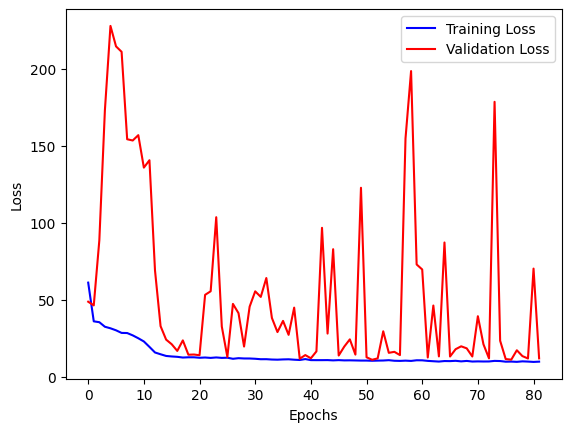

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='Training Loss', color='blue')
plt.plot(hist.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [106]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set
r2_test = r2_score(y_test, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)




R-squared score on test set: 0.7547353746688071
Mean Absolute Error (MAE): 3.130246598998583
Root Mean Squared Error (RMSE): 4.271807127307045


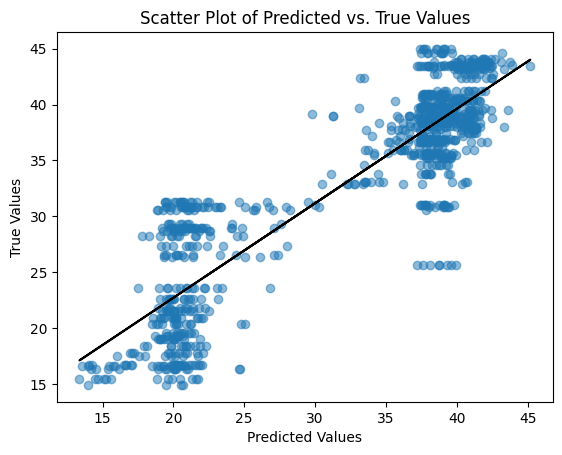

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred.flatten(), y_test.flatten(), 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MaxAbsScaler

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model with a linear kernel
model_svr = SVR(kernel="linear", verbose=3)

# Train the model_svr
model_svr.fit(X_train_scaled, y_train)

# Evaluate the model_svr
score = model_svr.score(X_test_scaled, y_test)
print("Model score:", score)


[LibSVM]Model score: 0.7061595881289835


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_svr.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared score on test set: 0.7061595881289835
Mean Absolute Error (MAE): 3.2660690815118585
Root Mean Squared Error (RMSE): 4.675735556304596
Mean Absolute Percentage Error (MAPE): 0.12332963066141314


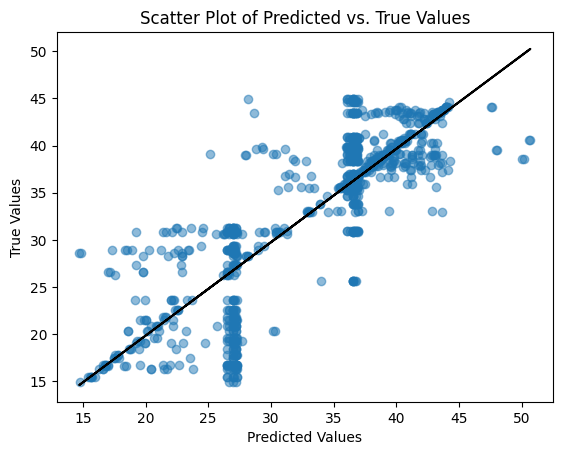

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create AdaBoostRegressor model
model_adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')

# Train the model_adaboost
model_adaboost.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model_adaboost.predict(X_test_scaled)

# Evaluate the model
score = r2_score(y_test, y_pred)
print("Model score:", score)


Model score: 0.750619656087296


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_adaboost.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared score on test set: 0.750619656087296
Mean Absolute Error (MAE): 3.5030690817148264
Root Mean Squared Error (RMSE): 4.3075000254701346
Mean Absolute Percentage Error (MAPE): 0.12692962494444318


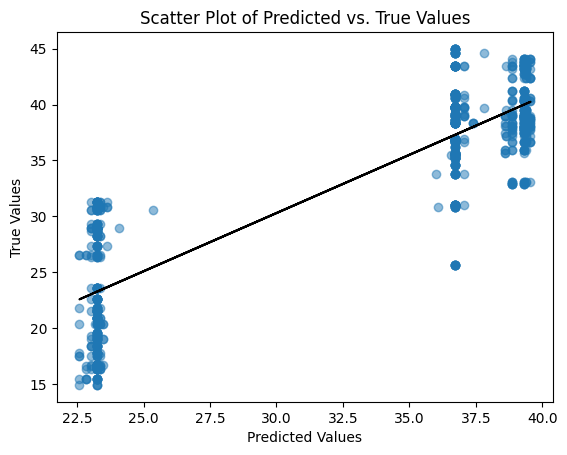

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# Model Saving

In [108]:
import pickle

model_filename = 'model_fast_v11.h5'
model.save('/content/drive/MyDrive/Skripsi/model/'+ model_filename)

scaler_filename = 'scaler.pkl'
scaler_filepath = '/content/drive/MyDrive/Skripsi/model/' + scaler_filename

with open(scaler_filepath, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
